# The Sparks Foundation

# Graduate Rotational Internship Program


# Task 1 Prediction using Supervised Machine Learning

# Author: Megha Daw

# Data Science & Business Analytics Intern


# Task Description

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

# Importing the required Libraries


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading the Data from source

In [2]:
new_df=pd.read_csv("student_scores.csv")

In [3]:
df=new_df.copy()

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Input data Visualization

#Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

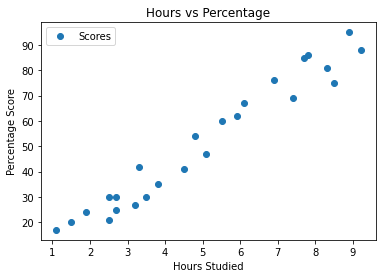

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Observation: From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data¶
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [10]:
#importing Linear Regression Model:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=123)

# Training the model

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


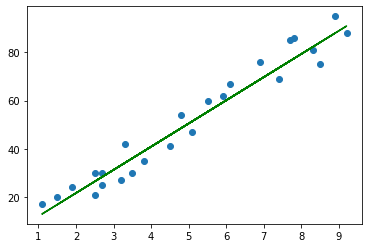

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='green');
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [4.8]
 [3.8]
 [6.1]
 [8.9]
 [8.3]
 [5.5]]


# Comparing Actual vs Predicted

In [14]:

newdata = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
newdata 

,Actual,Predicted
0,20,16.874397
1,54,48.611111
2,35,38.993925
3,67,61.113453
4,95,88.041574
5,81,82.271262
6,60,55.343141


# Estimating training and test score

In [15]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9463600657390446
Test Score: 0.9593798023076978


In [16]:
# You can also test with your own data
n = 9.25
hours = np.array([n])
hours= hours.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))




No of Hours = [[9.25]]
Predicted Score = 91.407589223163


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.468787262698272
Mean Squared Error: 23.019217337139715
Root Mean Squared Error: 4.7978346508753
R-2: 0.9593798023076978


# Conclusion

The final take away form this project is the working of Linear Regression model on
a dataset and understanding their parameters. Creating this notebook helped me to learn a lot about the parameters of the models. Accuracy of model comes to be 94.5% and the Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.